In [27]:
# Import Module
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

# Plotting Configurations
sns.set(style="whitegrid")
%matplotlib inline

# Loading data
df = pd.read_pickle("../processed/feature_engineered_df.pkl")

# Displaying info
display(Markdown(f"### ✅ Feature-Engineered Data Loaded"))
display(Markdown(f"**Shape:** {df.shape[0]:,} rows × {df.shape[1]} columns"))
display(df.head())

### ✅ Feature-Engineered Data Loaded

**Shape:** 1,754,155 rows × 15 columns

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_HOUR,TX_WEEKDAY,TX_MONTH,IS_WEEKEND,TX_AMOUNT_BIN,TX_COUNT
0,0,2018-04-01 00:00:31,596,3156,57.16,31,0,0,0,0,6,4,1,50-100,686
1,1,2018-04-01 00:02:10,4961,3412,81.51,130,0,0,0,0,6,4,1,50-100,738
2,2,2018-04-01 00:07:56,2,1365,146.00,476,0,0,0,0,6,4,1,100-500,338
3,3,2018-04-01 00:09:29,4128,8737,64.49,569,0,0,0,0,6,4,1,50-100,599
4,4,2018-04-01 00:10:34,927,9906,50.99,634,0,0,0,0,6,4,1,50-100,494


Fraud vs Non-Fraud Distribution (%)

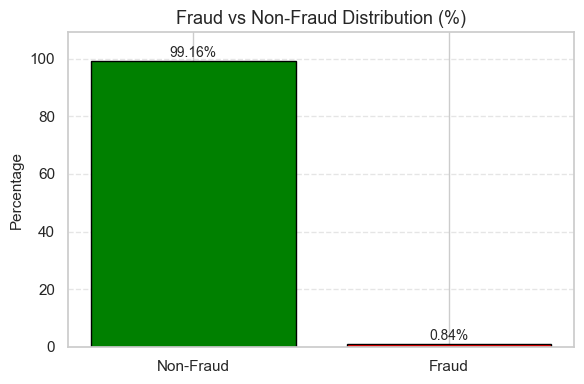

In [28]:
# Fraud Distribution (%)
display(Markdown("Fraud vs Non-Fraud Distribution (%)"))

# Calculate fraud distribution as percentage
fraud_counts = df["TX_FRAUD"].value_counts(normalize=True) * 100

# Plotting
plt.figure(figsize=(6, 4))
bars = plt.bar(
    x=["Non-Fraud", "Fraud"],
    height=fraud_counts.sort_index(),
    color=['green', 'red'],
    edgecolor='black'
)

# Adding value labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.2f}%', ha='center', va='bottom', fontsize=10)

# Titles and labels
plt.title("Fraud vs Non-Fraud Distribution (%)", fontsize=13)
plt.ylabel("Percentage", fontsize=11)
plt.xticks(rotation=0)
plt.ylim(0, max(fraud_counts) + 10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


🔍 Fraud Ratio: 0.8369%


### 💰 Transaction Amount Distribution by Fraud Status (Log Y-Axis)

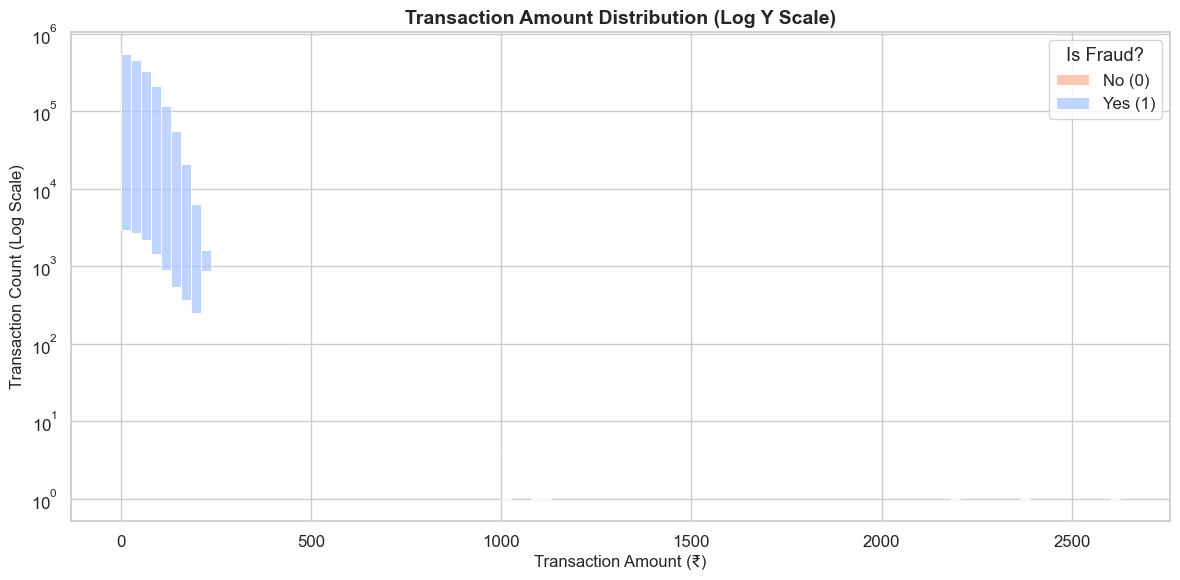

In [29]:
# Transaction Amount Distribution
sns.set(style="whitegrid", font_scale=1.1)

# Fraud Ratio
fraud_ratio = df['TX_FRAUD'].mean()
print(f"🔍 Fraud Ratio: {fraud_ratio:.4%}")

display(Markdown("### 💰 Transaction Amount Distribution by Fraud Status (Log Y-Axis)"))

plt.figure(figsize=(12, 6))
sns.histplot(
    data=df,
    x='TX_AMOUNT',
    bins=100,
    log_scale=(False, True),
    hue='TX_FRAUD',
    multiple="stack",
    palette="coolwarm"
)
plt.title("Transaction Amount Distribution (Log Y Scale)", fontsize=14, fontweight='bold')
plt.xlabel("Transaction Amount (₹)", fontsize=12)
plt.ylabel("Transaction Count (Log Scale)", fontsize=12)
plt.legend(title='Is Fraud?', labels=['No (0)', 'Yes (1)'])
plt.tight_layout()
plt.show()

2025-08-08 17:11:36,761 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-08-08 17:11:37,610 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


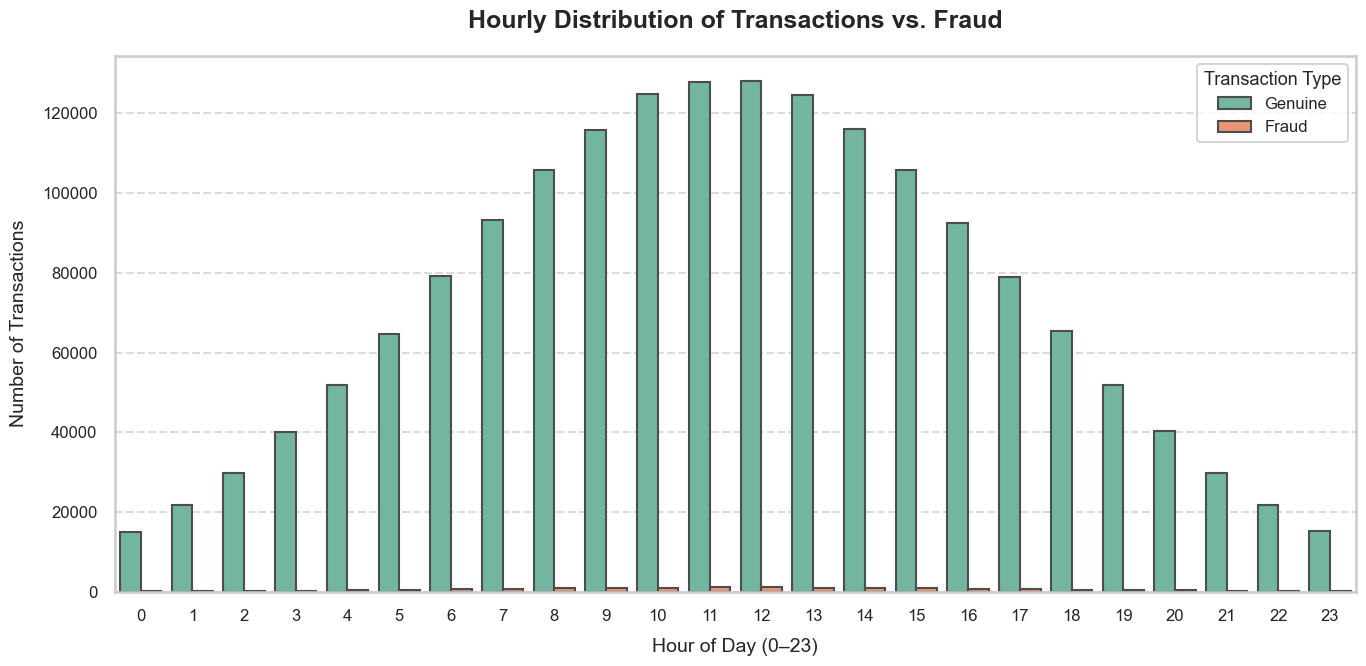

In [30]:
# Ensuring TX_HOUR is numeric and drop NaNs if conversion fails
df["TX_HOUR"] = pd.to_numeric(df["TX_HOUR"], errors='coerce')
df = df.dropna(subset=["TX_HOUR"])

# Convert to integer
df["TX_HOUR"] = df["TX_HOUR"].astype(int)

# Sorting by hour
df = df.sort_values(by="TX_HOUR")

# A clean, white grid style
sns.set(style="whitegrid", context="talk")

# Plotting
plt.figure(figsize=(14, 7))
ax = sns.countplot(
    data=df,
    x="TX_HOUR",
    hue="TX_FRAUD",
    palette=["#66c2a5", "#fc8d62"],
    edgecolor=".3"
)

# Titles and axis labels
plt.title("Hourly Distribution of Transactions vs. Fraud", fontsize=18, fontweight='bold', pad=20)
plt.xlabel("Hour of Day (0–23)", fontsize=14, labelpad=10)
plt.ylabel("Number of Transactions", fontsize=14, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles=handles,
    labels=["Genuine", "Fraud"],
    title="Transaction Type",
    loc='upper right',
    fontsize=12,
    title_fontsize=13
)

# Adding Grid and layout tight
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

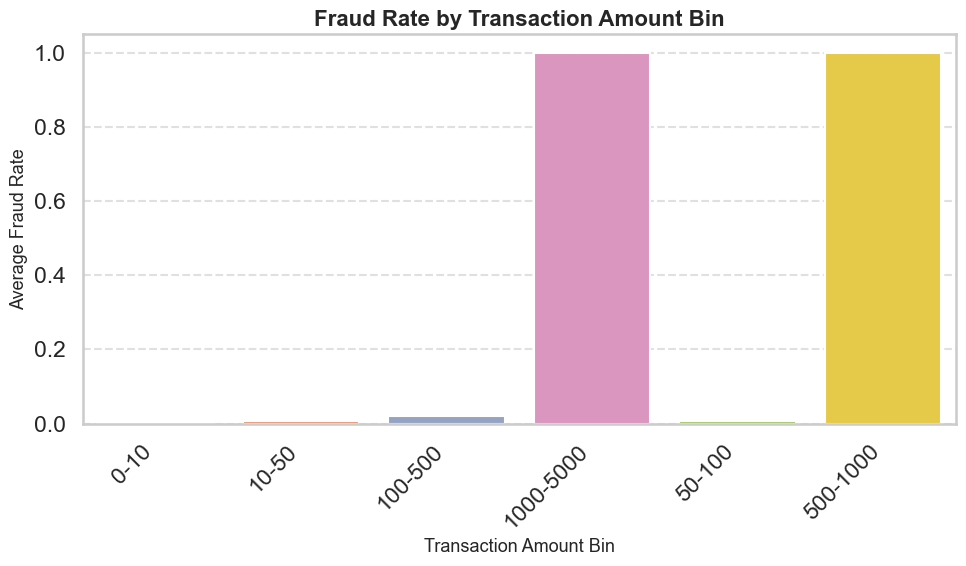

In [31]:
# Ensure TX_AMOUNT_BIN is categorical and ordered
df["TX_AMOUNT_BIN"] = pd.Categorical(df["TX_AMOUNT_BIN"], ordered=True, categories=sorted(df["TX_AMOUNT_BIN"].unique()))
amount_bin_fraud = df.groupby("TX_AMOUNT_BIN", observed=True)["TX_FRAUD"].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(
    data=amount_bin_fraud,
    x="TX_AMOUNT_BIN",
    y="TX_FRAUD",
    hue="TX_AMOUNT_BIN",
    palette="Set2",
    legend=False
)

# Styling
plt.title("Fraud Rate by Transaction Amount Bin", fontsize=16, weight='bold')
plt.xlabel("Transaction Amount Bin", fontsize=13)
plt.ylabel("Average Fraud Rate", fontsize=13)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

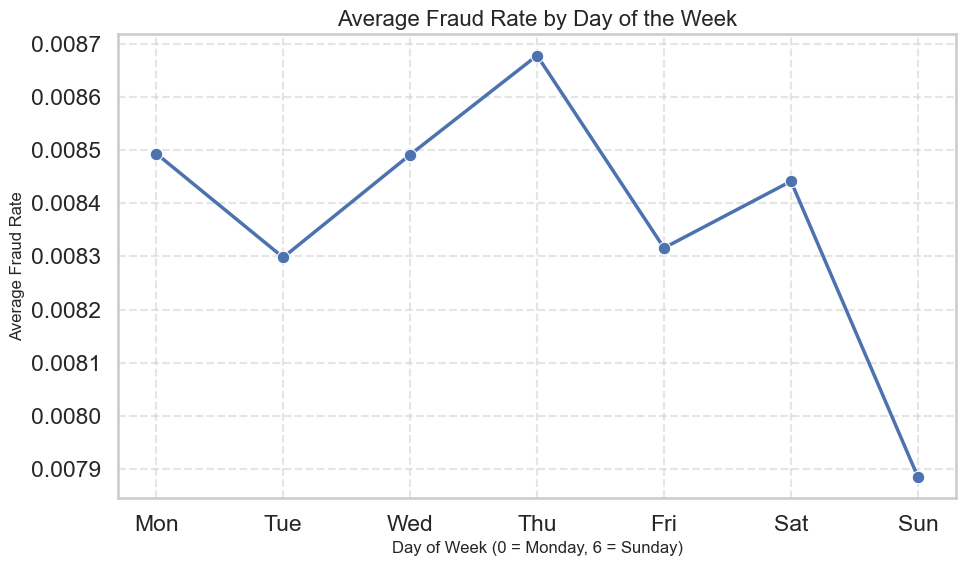

In [32]:
# Weekday Fraud Trend:
weekday_fraud = df.groupby("TX_WEEKDAY")["TX_FRAUD"].mean().reset_index()

# Visualization
plt.figure(figsize=(10, 6))
sns.lineplot(data=weekday_fraud, x="TX_WEEKDAY", y="TX_FRAUD", marker='o', linewidth=2.5)

# Enhancements
plt.title("Average Fraud Rate by Day of the Week", fontsize=16)
plt.xlabel("Day of Week (0 = Monday, 6 = Sunday)", fontsize=12)
plt.ylabel("Average Fraud Rate", fontsize=12)
plt.xticks(ticks=range(7), labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()